# Написание функций для работы с sqlite с использованием python

In [16]:
%load_ext sql
%sql sqlite:///base.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Лабораторная посвящена базе данных, связанной с футбольным командами. Схема расположена на картинке ниже.

## Схема
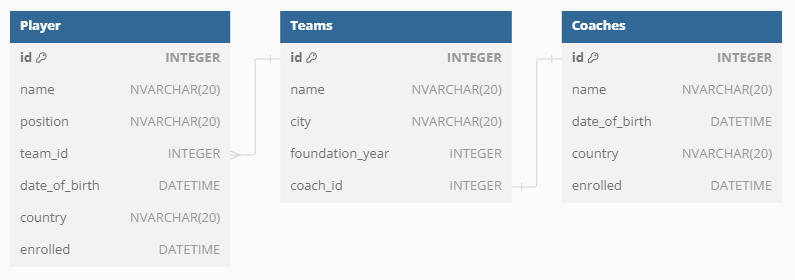

*enrolled* = дата найма

Имя команды и имя тренера - unique

# Задание 1
Реализовать таблицы со связями по схеме выше. Добавьте несколько команд и тренеров (через INSERT).

https://football-fun-live.com/tournaments/rossiya-premer-liga/coaches

(если лень придумывать)

In [17]:
%%sql
Pragma foreign_keys=on;

DROP TABLE if exists Player;
DROP TABLE if exists Teams;
DROP TABLE if exists Coaches;

CREATE TABLE Coaches (
          id INTEGER NOT NULL Primary key,
          name NVARCHAR(20) NOT NULL UNIQUE,
          date_of_birth DATETIME NOT NULL,
          country NVARCHAR(20) NOT NULL,
          enrolled DATETIME);

CREATE TABLE Teams (
          id INTEGER NOT NULL Primary key,
          name NVARCHAR(20) NOT NULL UNIQUE,
          city integer NOT NULL,
          foundation_year INTEGER NOT NULL,
          coach_id integer NOT NULL,
          FOREIGN KEY (coach_id) REFERENCES Coaches(id));

CREATE TABLE Player (
          id INTEGER NOT NULL Primary key,
          name NVARCHAR(20) NOT NULL,
          position NVARCHAR(20) NOT NULL,
          team_id INTEGER NOT NULL,
          date_of_birth DATETIME NOT NULL,
          country NVARCHAR(20) NOT NULL,
          enrolled DATETIME,
          FOREIGN KEY (team_id) REFERENCES Teams(id));

 * sqlite:///base.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [18]:
%%sql

INSERT INTO Coaches (name, date_of_birth, country, enrolled)
VALUES
('Alex Ferguson', '1941-12-31', 'Scotland', '1986-01-01'),
('Pep Guardiola', '1971-01-18', 'Spain', '2008-06-01'),
('Jurgen Klopp', '1967-06-16', 'Germany', '2001-09-01');

INSERT INTO Teams (name, city, foundation_year, coach_id)
VALUES
('Team Alpha', 'Los Angeles', 2000, 1),
('Team Bravo', 'Barcelona', 1995, 2),
('Team Charlie', 'London', 1988, 3);

INSERT INTO Player (name, position, team_id, date_of_birth, country, enrolled)
VALUES
('Michael Jordan', 'Shooting Guard', 1, '1963-02-17', 'USA', '1984-01-01'),
('LeBron James', 'Small Forward', 2, '1984-12-30', 'USA', '2003-07-01'),
('Lionel Messi', 'Forward', 2, '1987-06-24', 'Argentina', '2000-01-01'),
('Cristiano Ronaldo', 'Forward', 3, '1985-02-05', 'Portugal', '2002-08-01');

 * sqlite:///base.db
3 rows affected.
3 rows affected.
4 rows affected.


[]

In [19]:
%%sql

SELECT * FROM Player;

 * sqlite:///base.db
Done.


id,name,position,team_id,date_of_birth,country,enrolled
1,Michael Jordan,Shooting Guard,1,1963-02-17,USA,1984-01-01
2,LeBron James,Small Forward,2,1984-12-30,USA,2003-07-01
3,Lionel Messi,Forward,2,1987-06-24,Argentina,2000-01-01
4,Cristiano Ronaldo,Forward,3,1985-02-05,Portugal,2002-08-01


# Задание 2

Написать функцию, осуществляющую добавление нового футболиста в таблицу игроков. На входе (имя, позиция, **имя команды**, дата рождения, страна, дата перехода в команду(необязательный параметр)). Если дата перехода не указана, то нужно использовать текущую дату. Предусмотреть различные ошибки (такие как неверное название команды (игрока нельзя добавить, если его команды нет в таблице команд), возраст < 0 и т.п.)
Список возможных позиций: Вратарь, Защитник, Полузащитник, Нападающий.

После написания функции необходимо добавить несколько игроков (хотя бы по 1-2 на команду).

In [20]:
from datetime import date

str(date.today()) # сегодня

'2024-04-12'

In [21]:
import sqlite3
from datetime import datetime

connection = sqlite3.connect('base.db')

def add_player(name, position, team_name, date_of_birth, country, enrolled=None):
    cursor = connection.cursor()

    # Проверка наличия команды в таблице Teams
    cursor.execute("SELECT id FROM Teams WHERE name = ?", (team_name,))
    team = cursor.fetchone()
    if team is None:
        print("Ошибка: Команда '{}' не найдена.".format(team_name))
        return

    team_id = team[0]

    # Проверка даты рождения
    try:
        if date_of_birth > str(date.today()):
            print("Ошибка: Дата рождения не может быть в будущем.")
            return
    except:
        print("Ошибка: Неверный формат даты рождения.")
        return

    # Проверка позиции
    positions = ['Вратарь', 'Защитник', 'Полузащитник', 'Нападающий']
    if position not in positions:
        print("Ошибка: Неверная позиция. Пожалуйста, используйте одну из следующих: ", positions)
        return

    # Проверка даты перехода
    if enrolled:
        try:
            if enrolled > str(date.today()) or enrolled < date_of_birth:
                print("Ошибка: Дата перехода в будущем или раньше чем дата рождения.")
                return
        except:
            print("Ошибка: Неверный формат даты перехода.")
            return
    else:
        enrolled = str(date.today())

    # Добавление нового игрока
    try:
        cursor.execute("INSERT INTO Player (name, position, team_id, date_of_birth, country, enrolled) VALUES (?, ?, ?, ?, ?, ?)",
                       (name, position, team_id, date_of_birth, country, enrolled))
        connection.commit()
        print("Игрок '{}' успешно добавлен в таблицу Player.".format(name))
    except sqlite3.Error as e:
        print("Ошибка добавления игрока в таблицу Player:", e)

In [22]:
add_player('Yarik Malysh', 'Нападающий', 'FC Barcelona', '2004-12-24', 'Russia')
add_player('Danya Lykov', 'Двигатель прогресса', 'Team Alpha', '2004-09-14', 'Russia')
add_player('Sanya Lazarev', 'Защитник', 'Team Alpha', '2004-02-14', 'Russia', '2002-03-22')
add_player('Vika Kuslieva', 'Нападающий', 'Team Alpha', '2004-08-03', 'Russia', '2012-03-03')

Ошибка: Команда 'FC Barcelona' не найдена.
Ошибка: Неверная позиция. Пожалуйста, используйте одну из следующих:  ['Вратарь', 'Защитник', 'Полузащитник', 'Нападающий']
Ошибка: Дата перехода в будущем или раньше чем дата рождения.
Игрок 'Vika Kuslieva' успешно добавлен в таблицу Player.


# Задание 3
Написать функцию check_team, проверяющую корректность введенных данных о команде, а именно:
- наличие ровно одного вратаря и тренера
- год основания старше любой даты найма

Функция выдает True/False в зависимости от результата проверки

In [23]:
def check_team(team_name):
    cursor = connection.cursor()

    # Проверка наличия команды в таблице Teams
    cursor.execute("SELECT id FROM Teams WHERE name = ?", (team_name,))
    team = cursor.fetchone()
    if team is None:
        print("Ошибка: Команда '{}' не найдена.".format(team_name))
        return False

    team_id = team[0]

    # Проверка наличия ровно одного вратаря
    cursor.execute("SELECT COUNT(*) FROM Player WHERE team_id = ? AND position = 'Вратарь'", (team_id,))
    goalkeepers_count = cursor.fetchone()[0]
    if goalkeepers_count != 1:
        print("Ошибка: В команде должен быть ровно один вратарь.")
        return False

    # Проверка наличия тренера
    cursor.execute("SELECT COUNT(coach_id) FROM Teams WHERE id = ?", (team_id,))
    coach_id_cnt = cursor.fetchone()[0]
    if coach_id_cnt != 1:
        print("Ошибка: В команде должен быть тренер.")
        return False

    # Проверка года основания
    cursor.execute("SELECT foundation_year FROM Teams WHERE id = ?", (team_id,))
    foundation_year = cursor.fetchone()[0]
    cursor.execute("SELECT MIN(enrolled) FROM Player WHERE team_id = ?", (team_id,))
    min_enrolled = cursor.fetchone()[0]
    if str(foundation_year) <= str(min_enrolled):
        print("Ошибка: Год основания должен быть старше любой даты найма игроков.")
        return False

    return True

In [24]:
def number_3(team_name):
    if check_team(team_name):
        print("Данные о команде '{}' корректны.".format(team_name))
    else:
        print("Данные о команде '{}' некорректны.".format(team_name))

In [25]:
add_player('Danya Lykov', 'Вратарь', 'Team Bravo', '2004-09-14', 'Russia')
add_player('Sanya Lazarev', 'Вратарь', 'Team Bravo', '2004-02-14', 'Russia', '2005-03-22')
add_player('Vika Kuslieva', 'Нападающий', 'Team Bravo', '2004-08-03', 'Russia', '2012-03-03')

Игрок 'Danya Lykov' успешно добавлен в таблицу Player.
Игрок 'Sanya Lazarev' успешно добавлен в таблицу Player.
Игрок 'Vika Kuslieva' успешно добавлен в таблицу Player.


In [26]:
number_3('Team Bravo')

Ошибка: В команде должен быть ровно один вратарь.
Данные о команде 'Team Bravo' некорректны.


In [27]:
add_player('Danya Lykov', 'Вратарь', 'Team Charlie', '2004-09-14', 'Russia')
add_player('Sanya Lazarev', 'Вратарь', 'Team Charlie', '2004-02-14', 'Russia', '1800-03-22')
add_player('Vika Kuslieva', 'Нападающий', 'Team Charlie', '2004-08-03', 'Russia', '2012-03-03')

Игрок 'Danya Lykov' успешно добавлен в таблицу Player.
Ошибка: Дата перехода в будущем или раньше чем дата рождения.
Игрок 'Vika Kuslieva' успешно добавлен в таблицу Player.


In [28]:
number_3('Team Charlie')

Ошибка: Год основания должен быть старше любой даты найма игроков.
Данные о команде 'Team Charlie' некорректны.


In [29]:
add_player('Yarik Malysh', 'Нападающий', 'Team Alpha', '2004-12-24', 'Russia')
add_player('Danya Lykov', 'Вратарь', 'Team Alpha', '2004-09-14', 'Russia')
add_player('Sanya Lazarev', 'Защитник', 'Team Alpha', '2004-02-14', 'Russia', '2012-03-22')

Игрок 'Yarik Malysh' успешно добавлен в таблицу Player.
Игрок 'Danya Lykov' успешно добавлен в таблицу Player.
Игрок 'Sanya Lazarev' успешно добавлен в таблицу Player.


In [30]:
number_3('Team Alpha')

Данные о команде 'Team Alpha' корректны.
